In [ ]:
import os
from collections import Counter
import nltk

# Télécharger les ressources nécessaires
nltk.download("punkt", quiet=True)

def analyse_ocr_dossier_francais(dossier, fichier_dictionnaire):
    """
    Analyse la qualité d'OCR pour les fichiers .txt dans un dossier donné, en français.
    
    Args:
        dossier (str): Chemin vers le dossier contenant les fichiers .txt.
        fichier_dictionnaire (str): Chemin vers le fichier contenant les mots français.

    Returns:
        dict: Résumé des analyses pour chaque fichier.
    """
    # Charger le dictionnaire français
    with open(fichier_dictionnaire, "r", encoding="utf-8") as f:
        dictionnaire_francais = set(f.read().splitlines())
    
    resume_analyses = {}

    # Parcourir tous les fichiers du dossier
    for fichier in sorted(os.listdir(dossier)):
        if fichier.endswith(".txt"):  # Filtrer les fichiers .txt
            chemin_fichier = os.path.join(dossier, fichier)
            
            # Lire le contenu du fichier
            with open(chemin_fichier, "r", encoding="utf-8") as f:
                texte = f.read()
            
            # Tokenisation des mots
            mots = nltk.word_tokenize(texte)
            
            # Analyse des mots valides et invalides
            mots_valides = [mot for mot in mots if mot.lower() in dictionnaire_francais]
            mots_invalides = [mot for mot in mots if mot.lower() not in dictionnaire_francais]
            
            # Résumé pour ce fichier
            total_mots = len(mots)
            pourcentage_valides = len(mots_valides) / total_mots * 100 if total_mots > 0 else 0
            pourcentage_invalides = len(mots_invalides) / total_mots * 100 if total_mots > 0 else 0
            
            # Ajouter au résumé global
            resume_analyses[fichier] = {
                "total_mots": total_mots,
                "pourcentage_valides": pourcentage_valides,
                "pourcentage_invalides": pourcentage_invalides,
                "erreurs_frequentes": Counter(mots_invalides).most_common(5)
            }
    
    return resume_analyses

def charger_dictionnaire_francais(fichier_dictionnaire):
    """Charge une liste de mots français depuis un fichier texte."""
    with open(fichier_dictionnaire, "r", encoding="utf-8") as f:
        mots = f.read().splitlines()
    return set(mots)

def print_results(resultats):
    for fichier, stats in resultats.items():
        print(f"Fichier : {fichier}")
        print(f"  Total de mots : {stats['total_mots']}")
        print(f"  % de mots valides : {stats['pourcentage_valides']:.2f}%")
        print(f"  % de mots invalides : {stats['pourcentage_invalides']:.2f}%")
        print(f"  Erreurs fréquentes : {stats['erreurs_frequentes']}")
        print("-" * 40)


In [19]:
dossier_mixte = "../data/txt/txt_merged/mixtes"  # Remplacez par le chemin réel
dossier_feminins = "../data/txt/txt_merged/feminins"  # Remplacez par le chemin réel
dossier_masculins = "../data/txt/txt_merged/masculins"  # Remplacez par le chemin réel

fichier_dictionnaire = "../data/liste_francais_corrected.txt"  # Liste de mots français

resultats_mixtes = analyse_ocr_dossier_francais(dossier_mixte, fichier_dictionnaire)
resultats_feminins = analyse_ocr_dossier_francais(dossier_feminins, fichier_dictionnaire)
resultats_masculins = analyse_ocr_dossier_francais(dossier_masculins, fichier_dictionnaire)

print_results(resultats_mixtes)
print_results(resultats_feminins)
print_results(resultats_masculins)



Fichier : 01.txt
  Total de mots : 21693
  % de mots valides : 83.88%
  % de mots invalides : 16.12%
  Erreurs fréquentes : [('i', 53), ('ae', 52), ('méme', 37), ('e', 28), ('étre', 25)]
----------------------------------------
Fichier : 02.txt
  Total de mots : 107782
  % de mots valides : 83.85%
  % de mots invalides : 16.15%
  Erreurs fréquentes : [('méme', 197), ('..', 194), ('étre', 192), ('lenfant', 189), ('trés', 186)]
----------------------------------------
Fichier : 03.txt
  Total de mots : 22579
  % de mots valides : 77.64%
  % de mots invalides : 22.36%
  Erreurs fréquentes : [('fr', 86), ('remps', 66), ('i', 58), ('arriére', 55), ('in-16', 55)]
----------------------------------------
Fichier : 01_Atlas-.txt
  Total de mots : 77412
  % de mots valides : 74.99%
  % de mots invalides : 25.01%
  Erreurs fréquentes : [('ae', 449), ('i', 348), ('méme', 199), ('e', 190), ('..', 171)]
----------------------------------------
Fichier : 02.txt
  Total de mots : 57514
  % de mots va

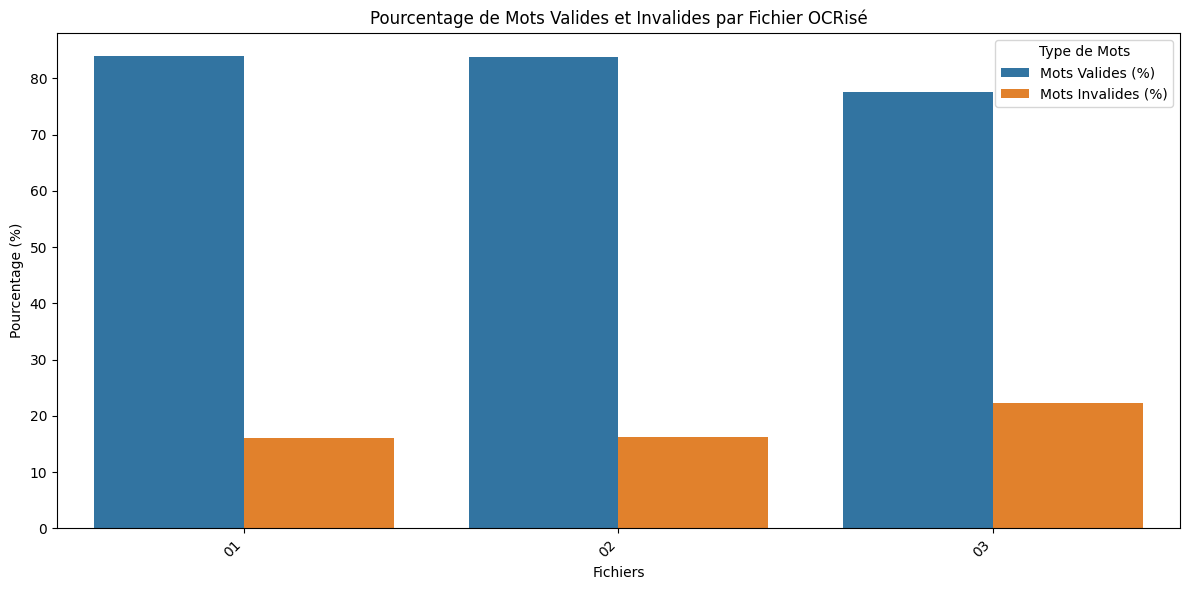

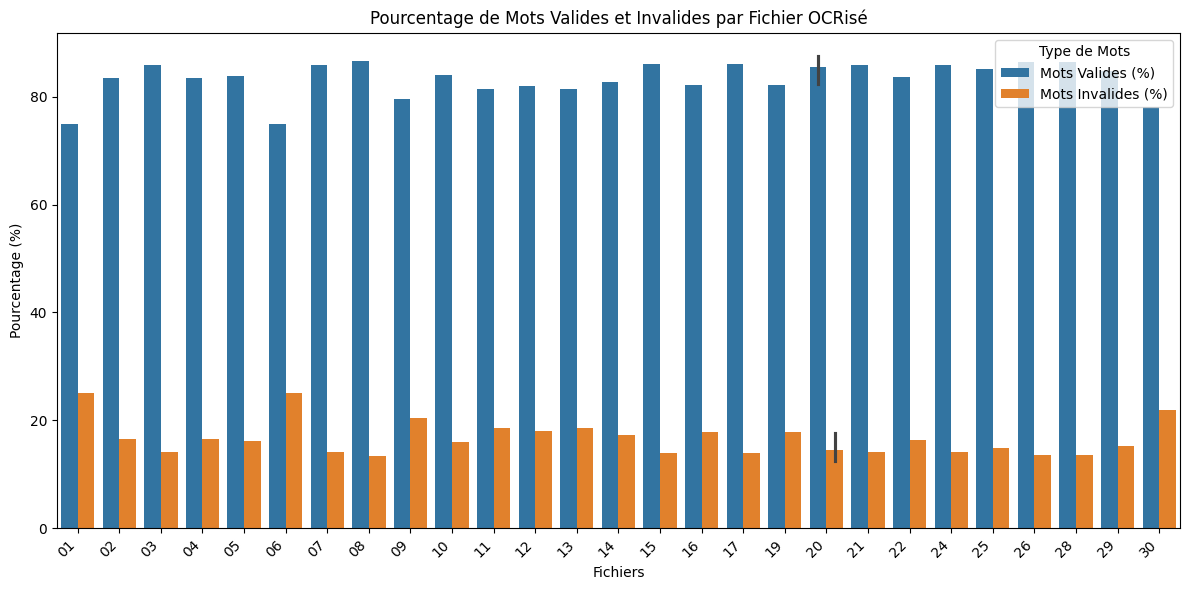

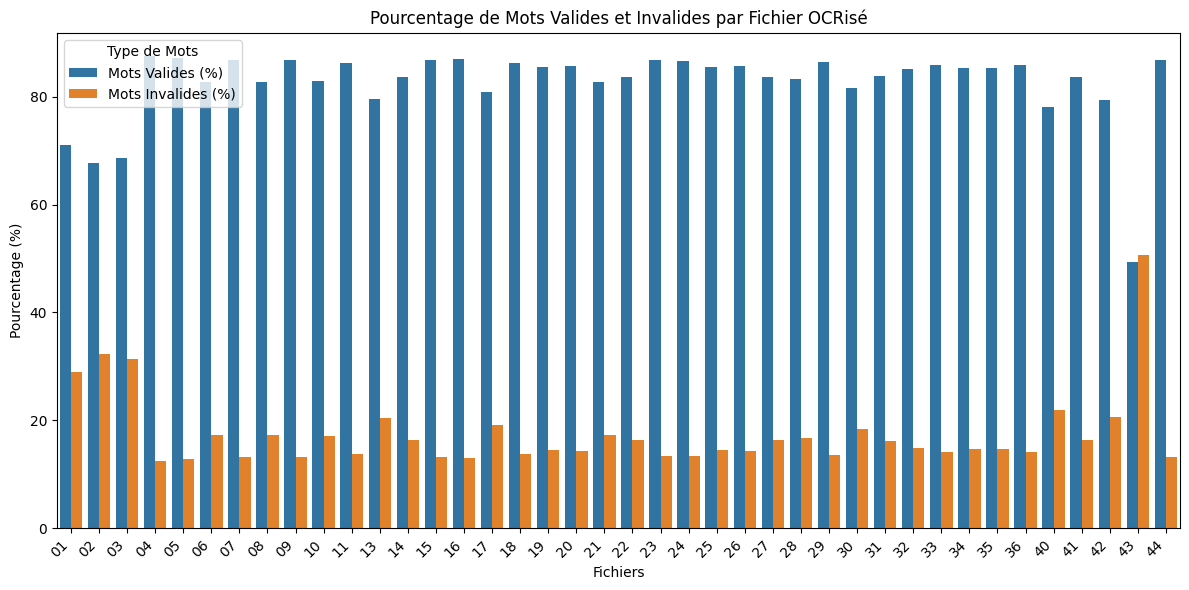

In [20]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def visualiser_benchmark_ocr(resultats):
    """
    Crée des visualisations pour analyser les résultats de la qualité OCR.
    
    Args:
        resultats (dict): Résultats de l'analyse OCR avec statistiques pour chaque fichier.
    """
    # Transformer les résultats en DataFrame pour faciliter la visualisation
    data = []
    for fichier, stats in resultats.items():
        data.append({
            "Fichier": fichier[:2],
            "Total Mots": stats["total_mots"],
            "Mots Valides (%)": stats["pourcentage_valides"],
            "Mots Invalides (%)": stats["pourcentage_invalides"]
        })
    df = pd.DataFrame(data)
    
    # Visualisation 1 : Barplot des mots valides et invalides par fichier
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df.melt(id_vars="Fichier", value_vars=["Mots Valides (%)", "Mots Invalides (%)"]),
                x="Fichier", y="value", hue="variable")
    plt.title("Pourcentage de Mots Valides et Invalides par Fichier OCRisé")
    plt.ylabel("Pourcentage (%)")
    plt.xlabel("Fichiers")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Type de Mots")
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
# Fournir le dictionnaire de résultats obtenu précédemment
visualiser_benchmark_ocr(resultats_mixtes)
visualiser_benchmark_ocr(resultats_feminins)
visualiser_benchmark_ocr(resultats_masculins)


In [21]:
def calculer_moyenne_pourcentage_valides(resultats):
    total_pourcentage_valides = 0
    nombre_fichiers = len(resultats)
    
    for stats in resultats.values():
        total_pourcentage_valides += stats['pourcentage_valides']
    
    moyenne_pourcentage_valides = total_pourcentage_valides / nombre_fichiers if nombre_fichiers > 0 else 0
    return moyenne_pourcentage_valides

# Exemple d'utilisation
moyenne_valides_mixtes = calculer_moyenne_pourcentage_valides(resultats_mixtes)
moyenne_valides_feminins = calculer_moyenne_pourcentage_valides(resultats_feminins)
moyenne_valides_masculins = calculer_moyenne_pourcentage_valides(resultats_masculins)

print(f"Moyenne des pourcentages de mots valides (mixtes) : {moyenne_valides_mixtes:.2f}%")
print(f"Moyenne des pourcentages de mots valides (feminins) : {moyenne_valides_feminins:.2f}%")
print(f"Moyenne des pourcentages de mots valides (masculins) : {moyenne_valides_masculins:.2f}%")

Moyenne des pourcentages de mots valides (mixtes) : 81.79%
Moyenne des pourcentages de mots valides (feminins) : 83.55%
Moyenne des pourcentages de mots valides (masculins) : 82.49%
